TABLA DE LOGARITMOS (Brigs)
x     log10 (Briggs)     log10 (Real)       Error Relativo 
------------------------------------------------------------
1     0.000000000000     0.000000000000     0.000000e+00   
2     0.304353572918     0.301029995664     1.104068e-02   
3     0.485437000092     0.477121254720     1.742900e-02   
4     0.608707145836     0.602059991328     1.104068e-02   
5     0.695646427082     0.698970004336     4.754964e-03   
6     0.789790573010     0.778151250384     1.495766e-02   
7     0.871229474256     0.845098040014     3.092119e-02   
8     0.913060718753     0.903089986992     1.104068e-02   
9     0.970874000184     0.954242509439     1.742900e-02   
10    1.000000000000     1.000000000000     0.000000e+00   


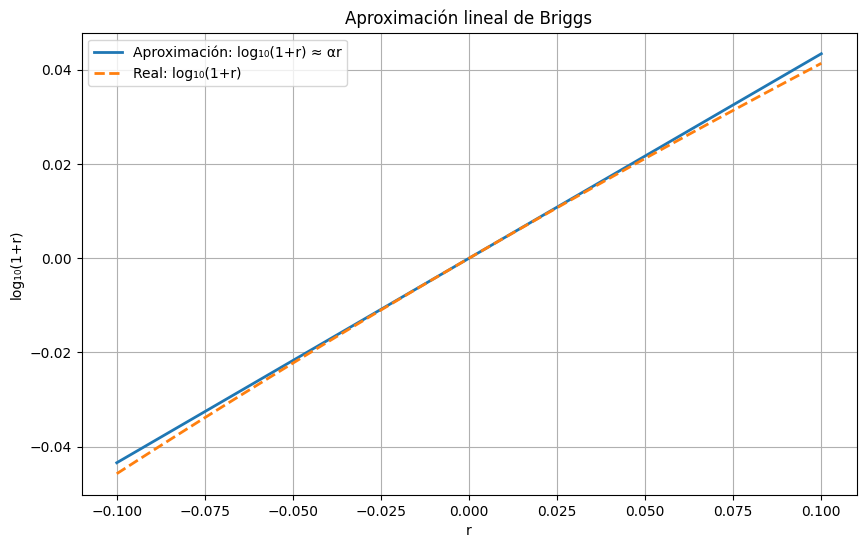


Máximo error absoluto: 2.328042e-03

Para log₁₀(6):
  Briggs: 0.789790573010
  Real: 0.778151250384
  Error relativo: 1.495766e-02


In [3]:
import math
import numpy as np

import matplotlib.pyplot as plt

# constantes
alpha = 1 / math.log(10)
num_sqrt = 5
significant_figures = 6

# función para redondear a n cifras significativas
def redondear(x, n):
    if x == 0:
        return 0
    return round(x, -int(math.floor(math.log10(abs(x)))) + (n - 1))

def briggs_log10(x, num_iterations=5):
    current = x
    for _ in range(num_iterations):
        current = redondear(math.sqrt(current), significant_figures)
    
    r = current - 1
    log_approx = alpha * r
    
    result = log_approx * (2 ** num_iterations)
    return result

x_values = list(range(1, 11))
log_briggs = {}
log_real = {}
error_relativo = {}

# Pistas para calcular logaritmos de 1 a 10 usando el método de Briggs
log_briggs[1] = 0.0
log_briggs[2] = briggs_log10(2)
log_briggs[10] = 1.0
log_briggs[4] = 2 * log_briggs[2]  
log_briggs[8] = 3 * log_briggs[2]  
log_briggs[5] = log_briggs[10] - log_briggs[2]  
log_briggs[3] = briggs_log10(3)
log_briggs[9] = 2 * log_briggs[3]  
log_briggs[6] = log_briggs[2] + log_briggs[3] 
log_briggs[7] = briggs_log10(7)

# valida los cálculos y calcula errores relativos
for x in x_values:
    log_real[x] = math.log10(x)
    if x == 1 or x == 10:
        error_relativo[x] = 0.0
    else:
        error_relativo[x] = abs(log_briggs[x] - log_real[x]) / log_real[x]

print("TABLA DE LOGARITMOS (Brigs)")
print(f"{'x':<5} {'log10 (Briggs)':<18} {'log10 (Real)':<18} {'Error Relativo':<15}")
print("-" * 60)
for x in x_values:
    print(f"{x:<5} {log_briggs[x]:<18.12f} {log_real[x]:<18.12f} {error_relativo[x]:<15.6e}")

# Gráfica de la aproximación lineal
r_values = np.linspace(-0.1, 0.1, 100)
log_approx_values = alpha * r_values
log_real_values = np.log10(1 + r_values)

plt.figure(figsize=(10, 6))
plt.plot(r_values, log_approx_values, label='Aproximación: log₁₀(1+r) ≈ αr', linewidth=2)
plt.plot(r_values, log_real_values, label='Real: log₁₀(1+r)', linewidth=2, linestyle='--')
plt.xlabel('r')
plt.ylabel('log₁₀(1+r)')
plt.title('Aproximación lineal de Briggs')
plt.legend()
plt.grid(True)
plt.show()

# Cálculo del máximo error absoluto en la gráfica
abs_errors = np.abs(np.array(log_approx_values) - np.array(log_real_values))
max_abs_error = np.max(abs_errors)
print(f"\nMáximo error absoluto: {max_abs_error:.6e}")

# Resultados específicos para log(6)
print(f"\nPara log₁₀(6):")
print(f"  Briggs: {log_briggs[6]:.12f}")
print(f"  Real: {log_real[6]:.12f}")
print(f"  Error relativo: {error_relativo[6]:.6e}")

